In [550]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#pd.set_option('display.max_rows', None)

In [551]:
df=pd.read_excel('C:/Users/Admin/Desktop/job_task/data.xlsx')

In [552]:
df.head()

,id,Date,Country_Code,Platform,Site_Name,Items_qty,Order_amount,Goods_cost
0,314512987,2017-11-30,GB,desktop,name_1,7,4.95,4.21
1,314522703,2017-11-30,SN,desktop,name_5,1,0.03,0.03
2,314634496,2017-11-30,NG,desktop,name_5,1,0.71,0.71
3,314570527,2017-11-30,IN,desktop,name_5,1,0.63,0.63
4,314601750,2017-11-30,IN,desktop,name_5,1,0.11,0.11


In [553]:
df.shape

(21905, 8)

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21905 entries, 0 to 21904
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21905 non-null  int64         
 1   Date          21905 non-null  datetime64[ns]
 2   Country_Code  21897 non-null  object        
 3   Platform      21905 non-null  object        
 4   Site_Name     21905 non-null  object        
 5   Items_qty     21905 non-null  int64         
 6   Order_amount  21905 non-null  float64       
 7   Goods_cost    21905 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [555]:
df.isnull().sum()/len(df)

id              0.000000
Date            0.000000
Country_Code    0.000365
Platform        0.000000
Site_Name       0.000000
Items_qty       0.000000
Order_amount    0.000000
Goods_cost      0.000000
dtype: float64

In [556]:
df[df.isnull().any(axis=1)]

,id,Date,Country_Code,Platform,Site_Name,Items_qty,Order_amount,Goods_cost
1593,313673106,2017-11-28,NaN,desktop,name_5,1,0.03,0.03
5330,311375001,2017-11-22,NaN,desktop,name_2,30,11.21,9.53
5331,311412300,2017-11-22,NaN,desktop,name_2,1,5.00,4.60
7319,310121287,2017-11-19,NaN,desktop,name_5,1,0.00,0.00
8773,309080469,2017-11-17,NaN,desktop,name_8,1,12.00,8.40
13378,307376556,2017-11-13,NaN,desktop,name_2,1,5.00,4.60
18668,303792443,2017-11-05,NaN,desktop,name_5,1,0.02,0.02
19927,302979459,2017-11-03,NaN,desktop,name_5,1,0.02,0.02


In [557]:
df = df.dropna()

In [558]:
df.shape

(21897, 8)

In [559]:
df.duplicated().sum()

0

In [560]:
df['Site_Name'].value_counts()

name_5    9835
name_1    9229
name_4     980
name_8     809
name_2     637
name_3     190
name_6     113
name_7     104
Name: Site_Name, dtype: int64

In [561]:
df['Country_Code'].nunique()

161

In [562]:
df['Platform'].value_counts()

desktop    20984
ios          610
android      228
mobile        75
Name: Platform, dtype: int64

In [563]:
df['Shipping_cost'] = round(df['Order_amount']-df['Goods_cost'],2)

In [564]:
df.head()

,id,Date,Country_Code,Platform,Site_Name,Items_qty,Order_amount,Goods_cost,Shipping_cost
0,314512987,2017-11-30,GB,desktop,name_1,7,4.95,4.21,0.74
1,314522703,2017-11-30,SN,desktop,name_5,1,0.03,0.03,0.00
2,314634496,2017-11-30,NG,desktop,name_5,1,0.71,0.71,0.00
3,314570527,2017-11-30,IN,desktop,name_5,1,0.63,0.63,0.00
4,314601750,2017-11-30,IN,desktop,name_5,1,0.11,0.11,0.00


### 1.Create Pivot Table with Sub totals

In [565]:
 df_group = (df.groupby(['Platform','Site_Name','Date','Country_Code'])
           .agg(Quantity_orders = ('Items_qty','sum'),
                Goods_cost = ('Goods_cost','sum'),
                Shipping_cost=('Shipping_cost','sum'))).reset_index()


In [566]:
# Step 1: Create the main pivot table without subtotals
df_pivot = df_group.pivot_table(
    values=['Quantity_orders', 'Goods_cost', 'Shipping_cost'],
    index=['Platform', 'Site_Name', 'Date'],
    columns='Country_Code',
    aggfunc='sum',
    fill_value=0
)
#Rearrange the multi-level columns
df_pivot = df_pivot.swaplevel(axis=1).sort_index(axis=1)


In [567]:
df_pivot

Country_Code                          AD                                \
                              Goods_cost Quantity_orders Shipping_cost   
Platform Site_Name Date                                                  
android  name_3    2017-11-01       0.00               0          0.00   
                   2017-11-02       0.00               0          0.00   
                   2017-11-03       0.00               0          0.00   
                   2017-11-04       0.00               0          0.00   
                   2017-11-05       0.00               0          0.00   
                   2017-11-06       0.00               0          0.00   
                   2017-11-07       0.00               0          0.00   
                   2017-11-08       0.00               0          0.00   
                   2017-11-09       0.00               0          0.00   
                   2017-11-10       0.00               0          0.00   
                   2017-11-11       0.00               0          0.00   
                   2017-11-12       0.00               0          0.00   
                   2017-11-13       0.00               0          0.00   
                   2017-11-14       0.00               0          0.00   
                   2017-11-15       0.00               0          0.00   
                   2017-11-16       0.00               0          0.00   
                   2017-11-17       0.00               0          0.00   
                   2017-11-18       0.00               0          0.00   
                   2017-11-19       0.00               0          0.00   
                   2017-11-20       0.00               0          0.00   
                   2017-11-21       0.00               0          0.00   
                   2017-11-22       0.00               0          0.00   
                   2017-11-23       0.00               0          0.00   
                   2017-11-24       0.00               0          0.00   
                   2017-11-25       0.00               0          0.00   
                   2017-11-26       0.00               0          0.00   
                   2017-11-27       0.00               0          0.00   
                   2017-11-28       0.00               0          0.00   
                   2017-11-29       0.00               0          0.00   
                   2017-11-30       0.00               0          0.00   
         name_7    2017-11-01       0.00               0          0.00   
                   2017-11-02       0.00               0          0.00   
                   2017-11-03       0.00               0          0.00   
                   2017-11-04       0.00               0          0.00   
                   2017-11-05       0.00               0          0.00   
                   2017-11-06       0.00               0          0.00   
                   2017-11-08       0.00               0          0.00   
                   2017-11-09       0.00               0          0.00   
                   2017-11-10       0.00               0          0.00   
                   2017-11-11       0.00               0          0.00   
                   2017-11-12       0.00               0          0.00   
                   2017-11-13       0.00               0          0.00   
                   2017-11-14       0.00               0          0.00   
                   2017-11-15       0.00               0          0.00   
                   2017-11-19       0.00               0          0.00   
                   2017-11-20       0.00               0          0.00   
                   2017-11-21       0.00               0          0.00   
                   2017-11-24       0.00               0          0.00   
                   2017-11-25       0.00               0          0.00   
                   2017-11-27       0.00               0          0.00   
                   2017-11-28       0.00               0          0.00   
    

In [568]:
# Step 2: Create the  pivot table with subtotals
df_pivot_with_subtotals = (
    df_pivot.groupby(level=[0, 1])
    .sum()
    .assign(Platform='Subtotal')
    .set_index(['Platform'], append=True)
    .sort_index()
)

In [569]:
df_pivot_with_subtotals.head()

Country_Code                        AD                                \
                            Goods_cost Quantity_orders Shipping_cost   
Platform Site_Name Platform                                            
android  name_3    Subtotal       0.00               0          0.00   
         name_7    Subtotal       0.00               0          0.00   
desktop  name_1    Subtotal      19.06              60          3.36   
         name_2    Subtotal       0.00               0          0.00   
         name_4    Subtotal       0.00               0          0.00   

Country_Code                        AE                                \
                            Goods_cost Quantity_orders Shipping_cost   
Platform Site_Name Platform                                            
android  name_3    Subtotal       0.00               0          0.00   
         name_7    Subtotal       0.00               0          0.00   
desktop  name_1    Subtotal      54.54              41          9.62   
         name_2    Subtotal       0.00               0          0.00   
         name_4    Subtotal       0.00               0          0.00   

Country_Code                        AF                                \
                            Goods_cost Quantity_orders Shipping_cost   
Platform Site_Name Platform                                            
android  name_3    Subtotal       0.00               0          0.00   
         name_7    Subtotal       0.00               0          0.00   
desktop  name_1    Subtotal       0.00               0          0.00   
         name_2    Subtotal       9.53              30          1.68   
         name_4    Subtotal       0.00               0          0.00   

Country_Code                        AG  ...            YE         ZA  \
                            Goods_cost  ... Shipping_cost Goods_cost   
Platform Site_Name Platform             ...                            
android  name_3    Subtotal        0.0  ...           0.0      21.00   
         name_7    Subtotal        0.0  ...           0.0       0.00   
desktop  name_1    Subtotal        0.0  ...           0.0      80.01   
         name_2    Subtotal        0.0  ...           0.0      18.40   
         name_4    Subtotal        0.0  ...           0.0       0.00   

Country_Code                                                      ZM  \
                            Quantity_orders Shipping_cost Goods_cost   
Platform Site_Name Platform                                            
android  name_3    Subtotal               6           9.0       0.00   
         name_7    Subtotal               0           0.0       0.00   
desktop  name_1    Subtotal             202          14.1       0.00   
         name_2    Subtotal               1           1.6       7.75   
         name_4    Subtotal               0           0.0       0.00   

Country_Code                                                      ZW  \
                            Quantity_orders Shipping_cost Goods_cost   
Platform Site_Name Platform                                            
android  name_3    Subtotal               0          0.00        0.0   
         name_7    Subtotal               0          0.00        0.0   
desktop  name_1    Subtotal               0          0.00        0.0   
         name_2    Subtotal               8          0.96       13.6   
         name_4    Subtotal               0          0.00        2.1   

Country_Code                                               
                            Quantity_orders Shipping_cost  
Platform Site_Name Platform                                
android  name_3    Subtotal               0          0.00  
         name_7    Subtotal               0          0.00  
desktop  name_1    Subtotal               0          0.00  
         name_2    Subtotal              38          2.32  
         name_4    Subtotal               4          0.90  

[5 rows x 483 columns]

In [570]:
# Step 3: Create the  final pivot table 
df_pivot_final = pd.concat([df_pivot, df_pivot_with_subtotals]).sort_index()

In [571]:
#Change date format
df_pivot_final =df_pivot_final.reset_index()
subtotals = df_pivot_final[df_pivot_final['Date'] == 'Subtotal']
main_data = df_pivot_final[df_pivot_final['Date'] != 'Subtotal']

main_data['Date'] = pd.to_datetime(main_data['Date']).dt.strftime('%Y-%m-%d')
main_data.sort_values(['Platform','Site_Name', 'Date'], ascending=[True,True, False], inplace=True)
df_pivot_final = pd.concat([main_data, subtotals]).sort_index()
df_pivot_final = df_pivot_final.set_index(['Platform', 'Site_Name', 'Date'])


In [572]:
df_pivot_final

Country_Code                          AD                                \
                              Goods_cost Quantity_orders Shipping_cost   
Platform Site_Name Date                                                  
android  name_3    2017-11-01       0.00               0          0.00   
                   2017-11-02       0.00               0          0.00   
                   2017-11-03       0.00               0          0.00   
                   2017-11-04       0.00               0          0.00   
                   2017-11-05       0.00               0          0.00   
                   2017-11-06       0.00               0          0.00   
                   2017-11-07       0.00               0          0.00   
                   2017-11-08       0.00               0          0.00   
                   2017-11-09       0.00               0          0.00   
                   2017-11-10       0.00               0          0.00   
                   2017-11-11       0.00               0          0.00   
                   2017-11-12       0.00               0          0.00   
                   2017-11-13       0.00               0          0.00   
                   2017-11-14       0.00               0          0.00   
                   2017-11-15       0.00               0          0.00   
                   2017-11-16       0.00               0          0.00   
                   2017-11-17       0.00               0          0.00   
                   2017-11-18       0.00               0          0.00   
                   2017-11-19       0.00               0          0.00   
                   2017-11-20       0.00               0          0.00   
                   2017-11-21       0.00               0          0.00   
                   2017-11-22       0.00               0          0.00   
                   2017-11-23       0.00               0          0.00   
                   2017-11-24       0.00               0          0.00   
                   2017-11-25       0.00               0          0.00   
                   2017-11-26       0.00               0          0.00   
                   2017-11-27       0.00               0          0.00   
                   2017-11-28       0.00               0          0.00   
                   2017-11-29       0.00               0          0.00   
                   2017-11-30       0.00               0          0.00   
                   Subtotal         0.00               0          0.00   
         name_7    2017-11-01       0.00               0          0.00   
                   2017-11-02       0.00               0          0.00   
                   2017-11-03       0.00               0          0.00   
                   2017-11-04       0.00               0          0.00   
                   2017-11-05       0.00               0          0.00   
                   2017-11-06       0.00               0          0.00   
                   2017-11-08       0.00               0          0.00   
                   2017-11-09       0.00               0          0.00   
                   2017-11-10       0.00               0          0.00   
                   2017-11-11       0.00               0          0.00   
                   2017-11-12       0.00               0          0.00   
                   2017-11-13       0.00               0          0.00   
                   2017-11-14       0.00               0          0.00   
                   2017-11-15       0.00               0          0.00   
                   2017-11-19       0.00               0          0.00   
                   2017-11-20       0.00               0          0.00   
                   2017-11-21       0.00               0          0.00   
                   2017-11-24       0.00               0          0.00   
                   2017-11-25       0.00               0          0.00   
                   2017-11-27       0.00               0          0.00   
    

In [573]:
df_pivot_final.sort_values(['Platform','Site_Name', 'Date'], ascending=[True,True, False], inplace=True)
df_pivot_final

Country_Code                          AD                                \
                              Goods_cost Quantity_orders Shipping_cost   
Platform Site_Name Date                                                  
android  name_3    Subtotal         0.00               0          0.00   
                   2017-11-30       0.00               0          0.00   
                   2017-11-29       0.00               0          0.00   
                   2017-11-28       0.00               0          0.00   
                   2017-11-27       0.00               0          0.00   
                   2017-11-26       0.00               0          0.00   
                   2017-11-25       0.00               0          0.00   
                   2017-11-24       0.00               0          0.00   
                   2017-11-23       0.00               0          0.00   
                   2017-11-22       0.00               0          0.00   
                   2017-11-21       0.00               0          0.00   
                   2017-11-20       0.00               0          0.00   
                   2017-11-19       0.00               0          0.00   
                   2017-11-18       0.00               0          0.00   
                   2017-11-17       0.00               0          0.00   
                   2017-11-16       0.00               0          0.00   
                   2017-11-15       0.00               0          0.00   
                   2017-11-14       0.00               0          0.00   
                   2017-11-13       0.00               0          0.00   
                   2017-11-12       0.00               0          0.00   
                   2017-11-11       0.00               0          0.00   
                   2017-11-10       0.00               0          0.00   
                   2017-11-09       0.00               0          0.00   
                   2017-11-08       0.00               0          0.00   
                   2017-11-07       0.00               0          0.00   
                   2017-11-06       0.00               0          0.00   
                   2017-11-05       0.00               0          0.00   
                   2017-11-04       0.00               0          0.00   
                   2017-11-03       0.00               0          0.00   
                   2017-11-02       0.00               0          0.00   
                   2017-11-01       0.00               0          0.00   
         name_7    Subtotal         0.00               0          0.00   
                   2017-11-30       0.00               0          0.00   
                   2017-11-28       0.00               0          0.00   
                   2017-11-27       0.00               0          0.00   
                   2017-11-25       0.00               0          0.00   
                   2017-11-24       0.00               0          0.00   
                   2017-11-21       0.00               0          0.00   
                   2017-11-20       0.00               0          0.00   
                   2017-11-19       0.00               0          0.00   
                   2017-11-15       0.00               0          0.00   
                   2017-11-14       0.00               0          0.00   
                   2017-11-13       0.00               0          0.00   
                   2017-11-12       0.00               0          0.00   
                   2017-11-11       0.00               0          0.00   
                   2017-11-10       0.00               0          0.00   
                   2017-11-09       0.00               0          0.00   
                   2017-11-08       0.00               0          0.00   
                   2017-11-06       0.00               0          0.00   
                   2017-11-05       0.00               0          0.00   
                   2017-11-04       0.00               0          0.00   
    

After sorting subtotals line moved to the top. Now I dont know how to fixed it.

### 2. Create a chart by day and number of items by platform

In [574]:
platform_items_group = df.groupby(['Date','Platform'])['Items_qty'].sum().reset_index()


In [575]:
platform_items_group['Date']=platform_items_group['Date'].dt.strftime('%m-%d')

In [576]:
desctop_items_group = platform_items_group[platform_items_group['Platform']=='desktop']
other_items_group = platform_items_group[platform_items_group['Platform']!='desktop']

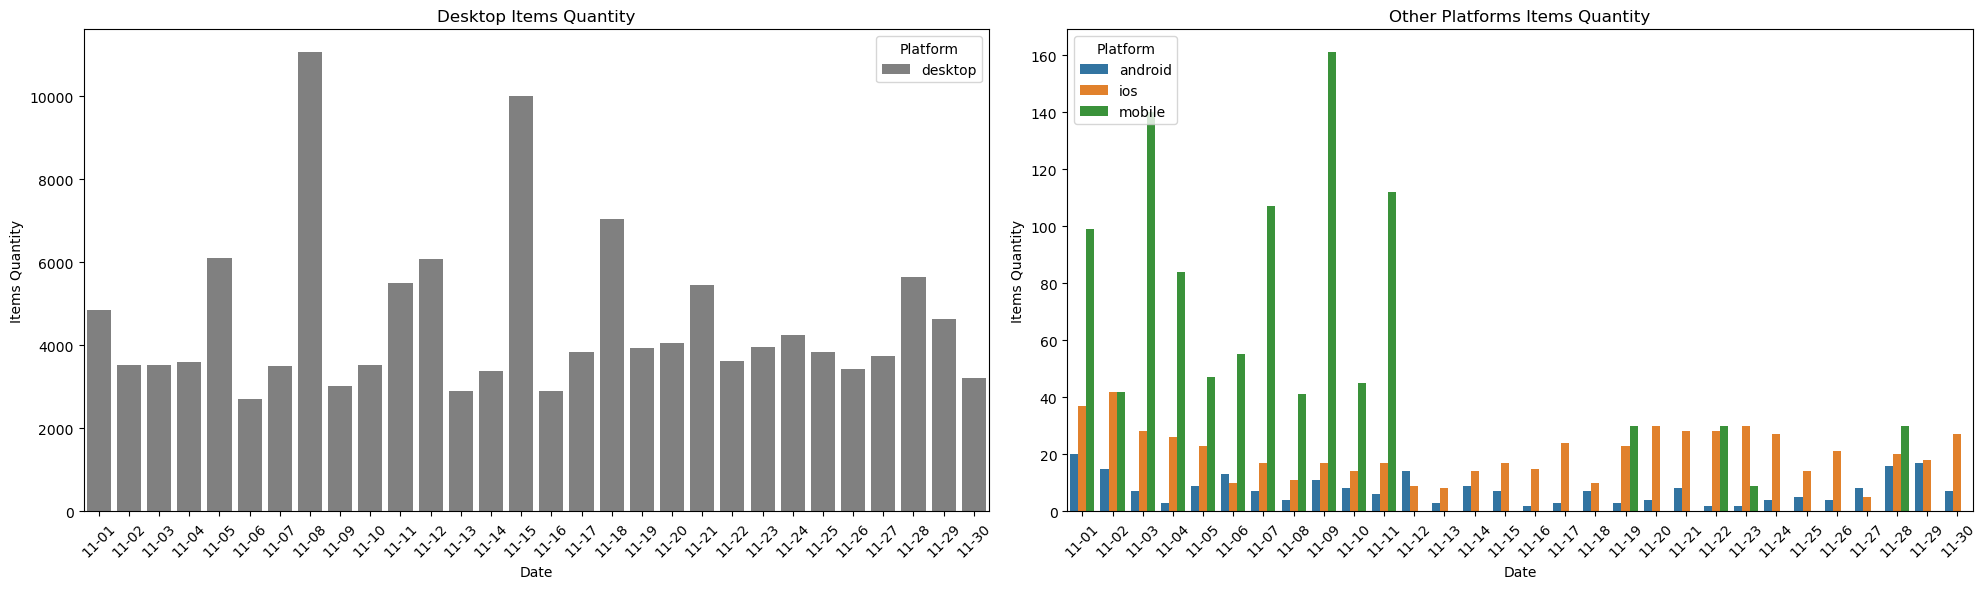

In [577]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))


sns.barplot(ax=axes[0], data=desctop_items_group, x='Date', y='Items_qty',hue='Platform',palette={'desktop': 'gray'})
axes[0].set_title('Desktop Items Quantity')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Items Quantity')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1], data=other_items_group, x='Date', y='Items_qty', hue='Platform')
axes[1].set_title('Other Platforms Items Quantity')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Items Quantity')
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


 Because the data on the Desktop platform significantly exceeds the others, I decided to make 2 graphs for better clarity.

In [578]:
df_cost_total = (df.groupby('Date')['Items_qty','Goods_cost'].sum().
                 reset_index().rename(columns = {'Goods_cost':'Total_cost'}))

In [579]:
df_cost_total['Date']=df_cost_total['Date'].dt.strftime('%m-%d')

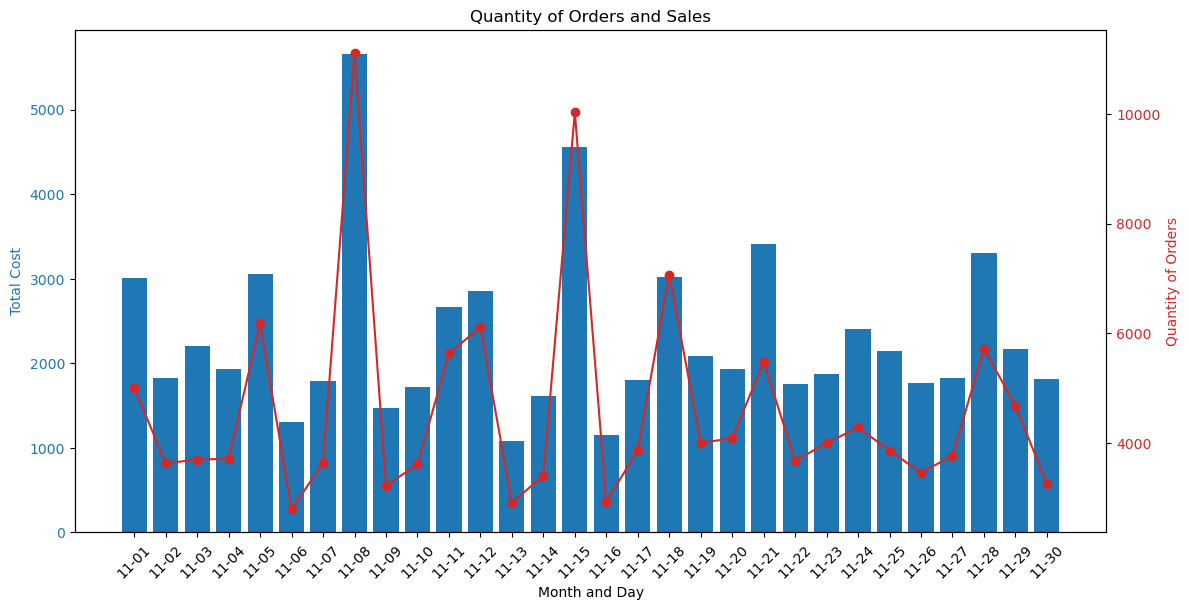

In [580]:
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Month and Day')
ax1.set_ylabel('Total Cost', color=color)
ax1.bar(df_cost_total['Date'], df_cost_total['Total_cost'], color=color, label='Total Cost')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45, labelright=False)  # Rotate x-axis labels here

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Quantity of Orders', color=color)
ax2.plot(df_cost_total['Date'], df_cost_total['Items_qty'], color=color, marker='o', linestyle='-', label='Quantity of Orders')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Quantity of Orders and Sales')
plt.show()